## Run data pipeline
Returns an aggegrated df to work with

In [9]:
## Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # plotting library
import pandas as pd

In [10]:
filename = '/home/joelva/code/pgt-group-3/data/raw/Complete_Set/DeltaH2.parquet'
df = pd.read_parquet(filename)


In [11]:
#%run "./Data"

## Import utilities
Import custom function

In [13]:
%run -i  "./Utilities.ipynb" 

In [12]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm 

(               datetime  H2Weight  DeltaH2Weight
 datetime       1.000000 -0.085761       0.000116
 H2Weight      -0.085761  1.000000       0.005173
 DeltaH2Weight  0.000116  0.005173       1.000000,
 <Axes: >)

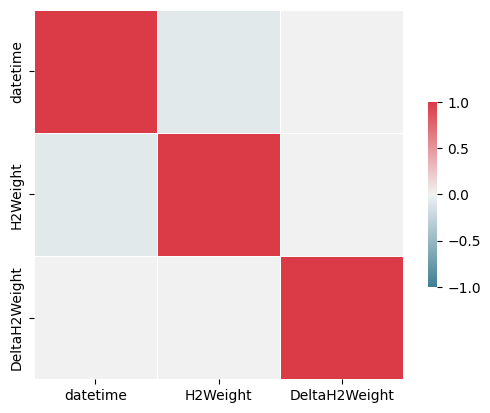

In [14]:
plot_corr(df)


In [15]:
describe_column(df,'DeltaH2Weight',100000)

Column: DeltaH2Weight
Minimum value: -15163.0
Maximum value: 15179.0


/tmp/ipykernel_24359/2386358824.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bin')[column_name].size()


Number of values per bin (excluding bins with 0 values):
(-15163.001, 84837.0]: 34776383 values


In [16]:
describe_column(df,'H2Weight',0.1)

Column: H2Weight
Minimum value: 0.0
Maximum value: 15249.0


/tmp/ipykernel_24359/2386358824.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bin')[column_name].size()


Number of values per bin (excluding bins with 0 values):
(-0.001, 0.1]: 24008517 values
(516.9, 517.0]: 1 values
(532.9, 533.0]: 20 values
(533.9, 534.0]: 19 values
(534.9, 535.0]: 32 values
(540.9, 541.0]: 166 values
(541.9, 542.0]: 136 values
(542.9, 543.0]: 148 values
(546.9, 547.0]: 2 values
(547.9, 548.0]: 2 values
(548.9, 549.0]: 432 values
(549.9, 550.0]: 285 values
(550.9, 551.0]: 396 values
(555.9, 556.0]: 2 values
(556.9, 557.0]: 364 values
(557.9, 558.0]: 193 values
(558.9, 559.0]: 322 values
(561.9, 562.0]: 36 values
(562.9, 563.0]: 10 values
(563.9, 564.0]: 127 values
(564.9, 565.0]: 238 values
(565.9, 566.0]: 165 values
(566.9, 567.0]: 106 values
(570.9, 571.0]: 226 values
(571.9, 572.0]: 60 values
(572.9, 573.0]: 565 values
(573.9, 574.0]: 280 values
(574.9, 575.0]: 138 values
(576.9, 577.0]: 1 values
(579.9, 580.0]: 199 values
(580.9, 581.0]: 43 values
(581.9, 582.0]: 346 values
(582.9, 583.0]: 107 values
(583.9, 584.0]: 33 values
(584.9, 585.0]: 1 values
(585.9, 586.0]

In [17]:
df.head()

datetime  H2Weight  DeltaH2Weight            Bin
0        2022-08-01 04:04:12+00:00       0.0            NaN  (-0.001, 0.1]
1 2022-08-01 04:04:12.240000+00:00       0.0            0.0  (-0.001, 0.1]
2 2022-08-01 04:04:12.480000+00:00       0.0            0.0  (-0.001, 0.1]
3 2022-08-01 04:04:12.780000+00:00       0.0            0.0  (-0.001, 0.1]
4 2022-08-01 04:04:13.020000+00:00       0.0            0.0  (-0.001, 0.1]

In [18]:
# Getting the number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns (fields): {num_columns}")

Number of rows: 34776607
Number of columns (fields): 4


In [19]:
# List data types of each column
dtypes_result = df.dtypes

# Display descriptive statistics for numerical columns
describe_result = df.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)

                            Data Types    Statistics              
                                     0      H2Weight DeltaH2Weight
datetime       datetime64[us, Etc/UTC]           NaN           NaN
H2Weight                       float64           NaN           NaN
DeltaH2Weight                  float64           NaN           NaN
Bin                           category           NaN           NaN
count                              NaN  3.477661e+07  3.477638e+07
mean                               NaN  2.654331e+03 -1.315928e-02
std                                NaN  4.455797e+03  4.770106e+01
min                                NaN  0.000000e+00 -1.516300e+04
25%                                NaN  0.000000e+00  0.000000e+00
50%                                NaN  0.000000e+00  0.000000e+00
75%                                NaN  5.201000e+03  0.000000e+00
max                                NaN  1.524900e+04  1.517900e+04


In [20]:
#Select one specific day

df['datetime'] = pd.to_datetime(df['datetime'])

# Define your date range
start_date = '2022-08-29 00:00:00+00:00'
end_date = '2022-08-29 23:59:59.999999+00:00'

# Convert the date range strings to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Use boolean indexing to select rows within the date range and where feature_x > 0
selected_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date) & (df['H2Weight'] > 0)]

print(selected_data)

                                datetime  H2Weight  DeltaH2Weight  \
4744346 2022-08-29 04:03:23.010000+00:00   14197.0            NaN   
4744347 2022-08-29 04:03:23.240000+00:00   14198.0            1.0   
4744348 2022-08-29 04:03:23.480000+00:00   14197.0           -1.0   
4744349 2022-08-29 04:03:23.720000+00:00   14197.0            0.0   
4744350 2022-08-29 04:03:24.020000+00:00   14197.0            0.0   
...                                  ...       ...            ...   
4858410 2022-08-29 11:58:39.900000+00:00    5623.0            0.0   
4858411 2022-08-29 11:58:40.200000+00:00    5623.0            0.0   
4858412 2022-08-29 11:58:40.440000+00:00    5623.0            0.0   
4858413 2022-08-29 11:58:40.680000+00:00    5623.0            0.0   
4858414 2022-08-29 11:58:40.920000+00:00    5623.0            0.0   

                        Bin  
4744346  (14196.9, 14197.0]  
4744347  (14197.9, 14198.0]  
4744348  (14196.9, 14197.0]  
4744349  (14196.9, 14197.0]  
4744350  (14196.9, 14

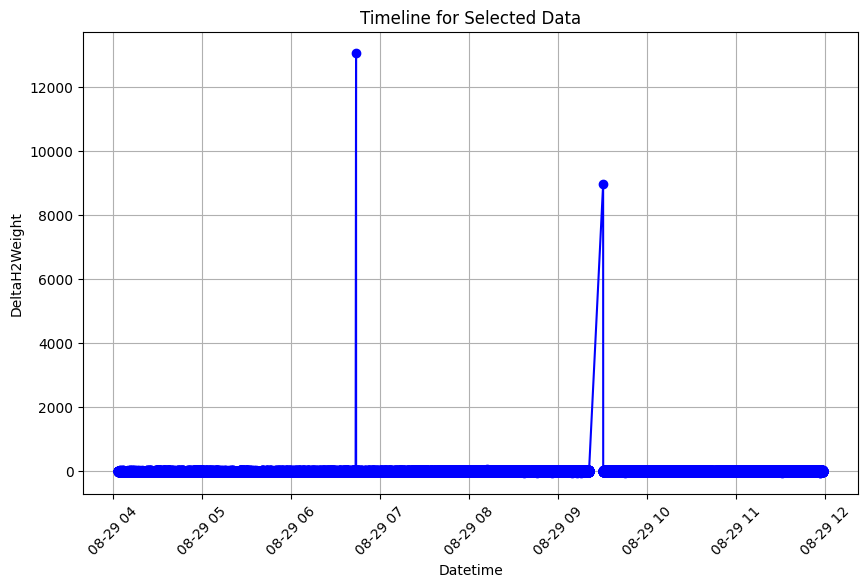

In [21]:

df['datetime'] = pd.to_datetime(df['datetime'])

# Define your date range
start_date = '2022-08-29 00:00:00+00:00'
end_date = '2022-08-29 23:59:59.999999+00:00'

# Convert the date range strings to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Use boolean indexing to select rows within the date range and where H2Weight > 0
selected_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date) & (df['H2Weight'] > 0)]

# Plot timeline for selected_data
plt.figure(figsize=(10, 6))
plt.plot(selected_data['datetime'], selected_data['DeltaH2Weight'], marker='o', linestyle='-', color='b')
plt.title('Timeline for Selected Data')
plt.xlabel('Datetime')
plt.ylabel('DeltaH2Weight')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

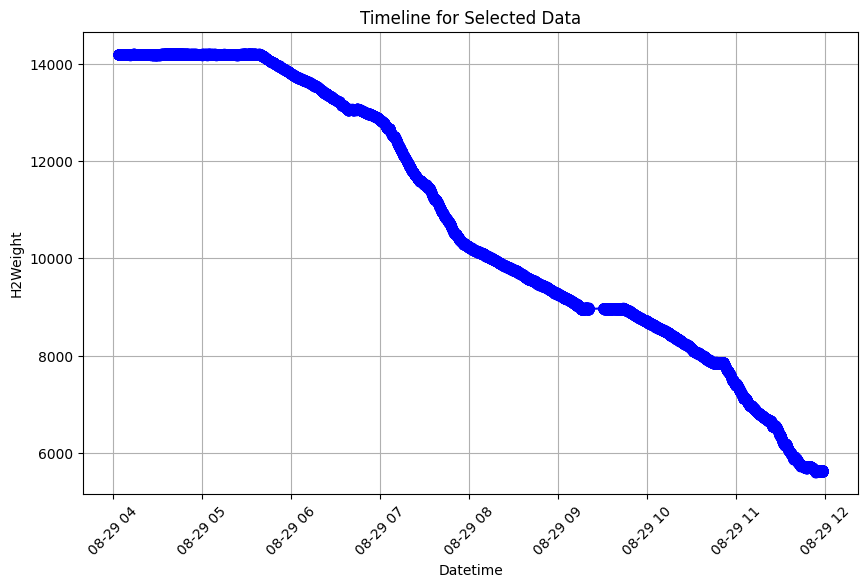

In [22]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Define your date range
start_date = '2022-08-29 00:00:00+00:00'
end_date = '2022-08-29 23:59:59.999999+00:00'

# Convert the date range strings to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Use boolean indexing to select rows within the date range and where H2Weight > 0
selected_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date) & (df['H2Weight'] > 0)]

# Plot timeline for selected_data
plt.figure(figsize=(10, 6))
plt.plot(selected_data['datetime'], selected_data['H2Weight'], marker='o', linestyle='-', color='b')
plt.title('Timeline for Selected Data')
plt.xlabel('Datetime')
plt.ylabel('H2Weight')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipykernel_24359/4114562831.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['CumulativeDeltaH2Weight'] = selected_data['DeltaH2Weight'].cumsum()


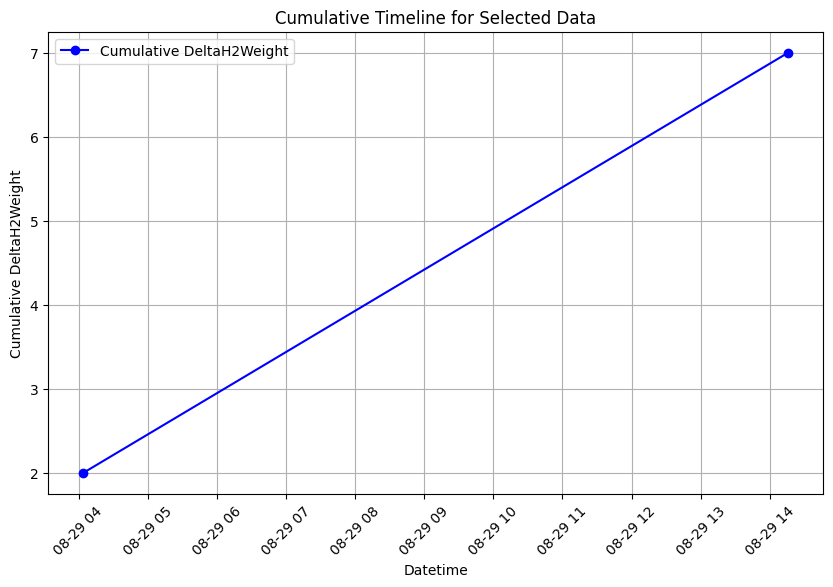

In [26]:
df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])

# Define your date range
start_date = '2022-08-29 00:00:00+00:00'
end_date = '2022-08-29 23:59:59.999999+00:00'

# Convert the date range strings to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Use boolean indexing to select rows within the date range and where H2Weight > 0
selected_data = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date) & (df['H2Weight'] > 0)]

# Create a cumulative sum of 'DeltaH2Weight'
selected_data['CumulativeDeltaH2Weight'] = selected_data['DeltaH2Weight'].cumsum()

# Plot cumulative timeline for 'DeltaH2Weight'
plt.figure(figsize=(10, 6))
plt.plot(selected_data['datetime'], selected_data['CumulativeDeltaH2Weight'], marker='o', linestyle='-', color='b', label='Cumulative DeltaH2Weight')
plt.title('Cumulative Timeline for Selected Data')
plt.xlabel('Datetime')
plt.ylabel('Cumulative DeltaH2Weight')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


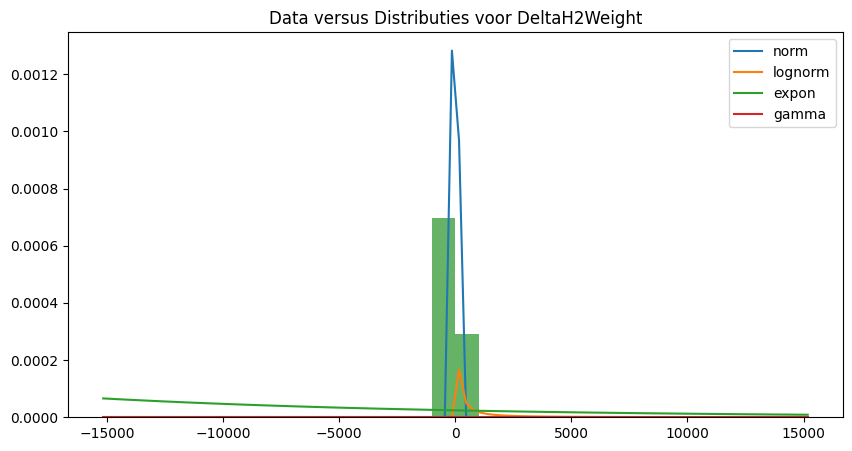

Beste fit voor DeltaH2Weight: norm
  Parameters: (-0.05081182762448999, 93.73340933392804)
  SSE: 79129883268.4583



In [9]:
analyze_distributions(df, ['DeltaH2Weight'], [stats.norm, stats.lognorm, stats.expon, stats.gamma])

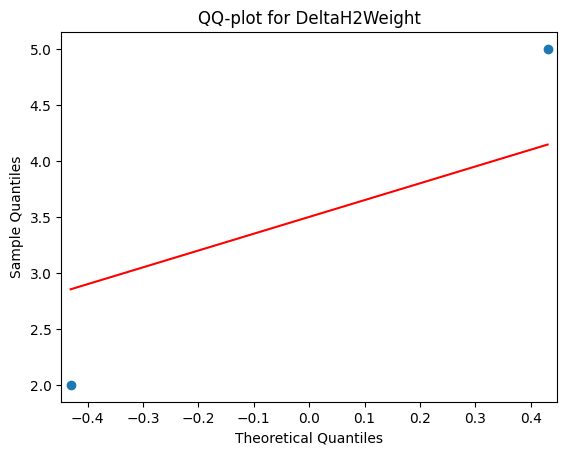

In [33]:
#QQ-Plot


df = pd.DataFrame(selected_data)

# Create QQ-plot for 'DeltaH2Weight' only
sm.qqplot(df['DeltaH2Weight'], line='s')
plt.title('QQ-plot for DeltaH2Weight')
plt.show()

KeyboardInterrupt: 

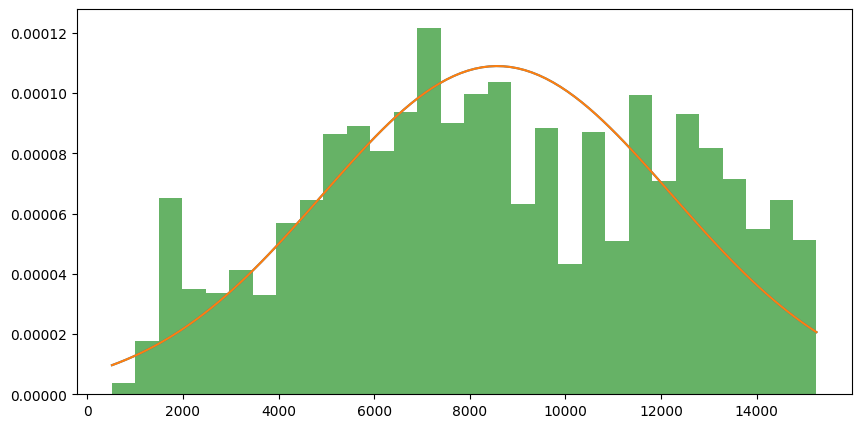

In [11]:
analyze_distributions(df, ['H2Weight'], [stats.norm, stats.lognorm, stats.expon, stats.gamma])

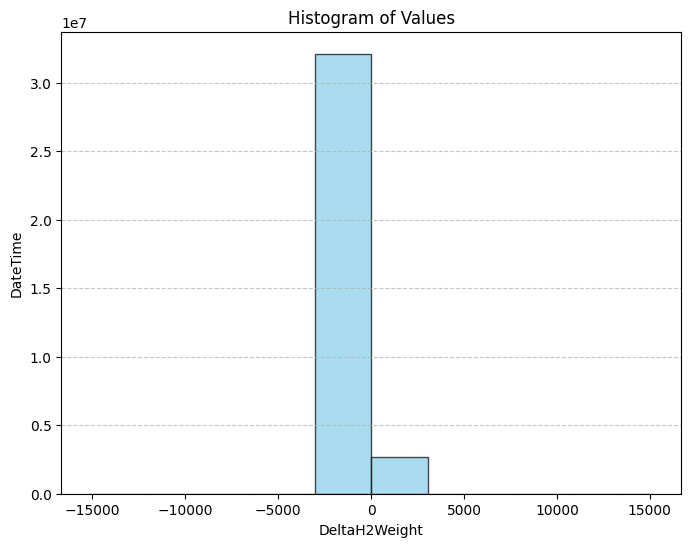

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])

# Create a histogram as a timeline using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='datetime', y='H2Weight', bins=8, color='skyblue', edgecolor='black', kde=False)
plt.title('Histogram as Timeline')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

: 

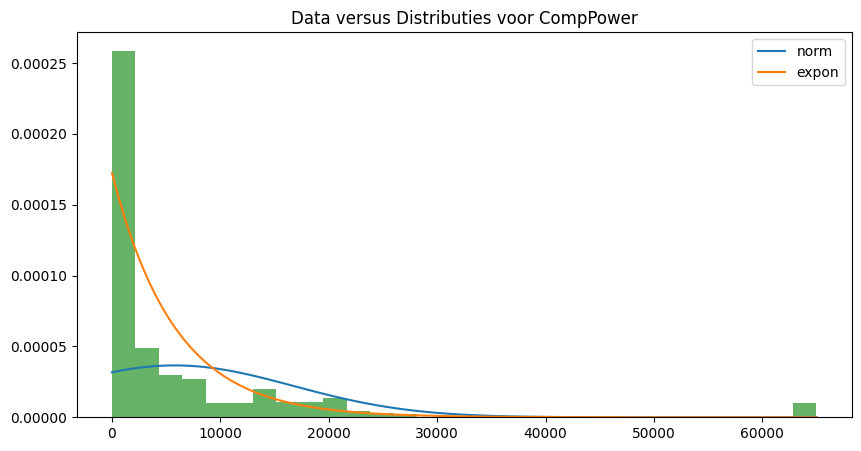

Beste fit voor CompPower: expon
  Parameters: (0.025, 5803.114203828019)
  SSE: 22896676695395.773



In [25]:
analyze_distributions(df, ['CompPower'], [stats.norm,  stats.expon])

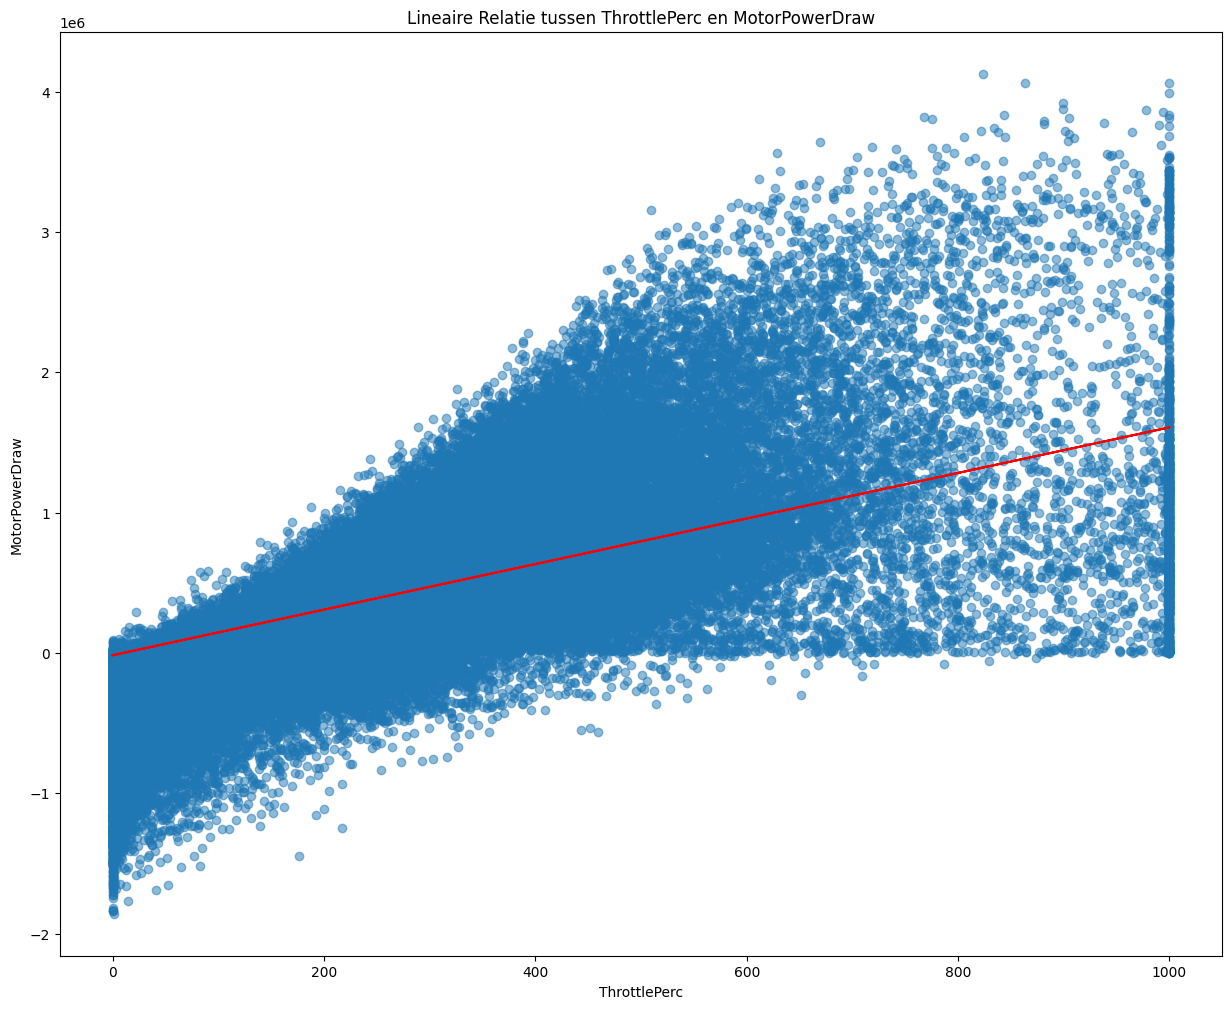

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 1623.69
  Intercept: -15500.36
  Correlatiecoëfficiënt (R-waarde): 0.74
  P-waarde: 0.00
  Sterke en significante relatie.




In [13]:
plot_linear_relationships(df, 'ThrottlePerc','MotorPowerDraw')

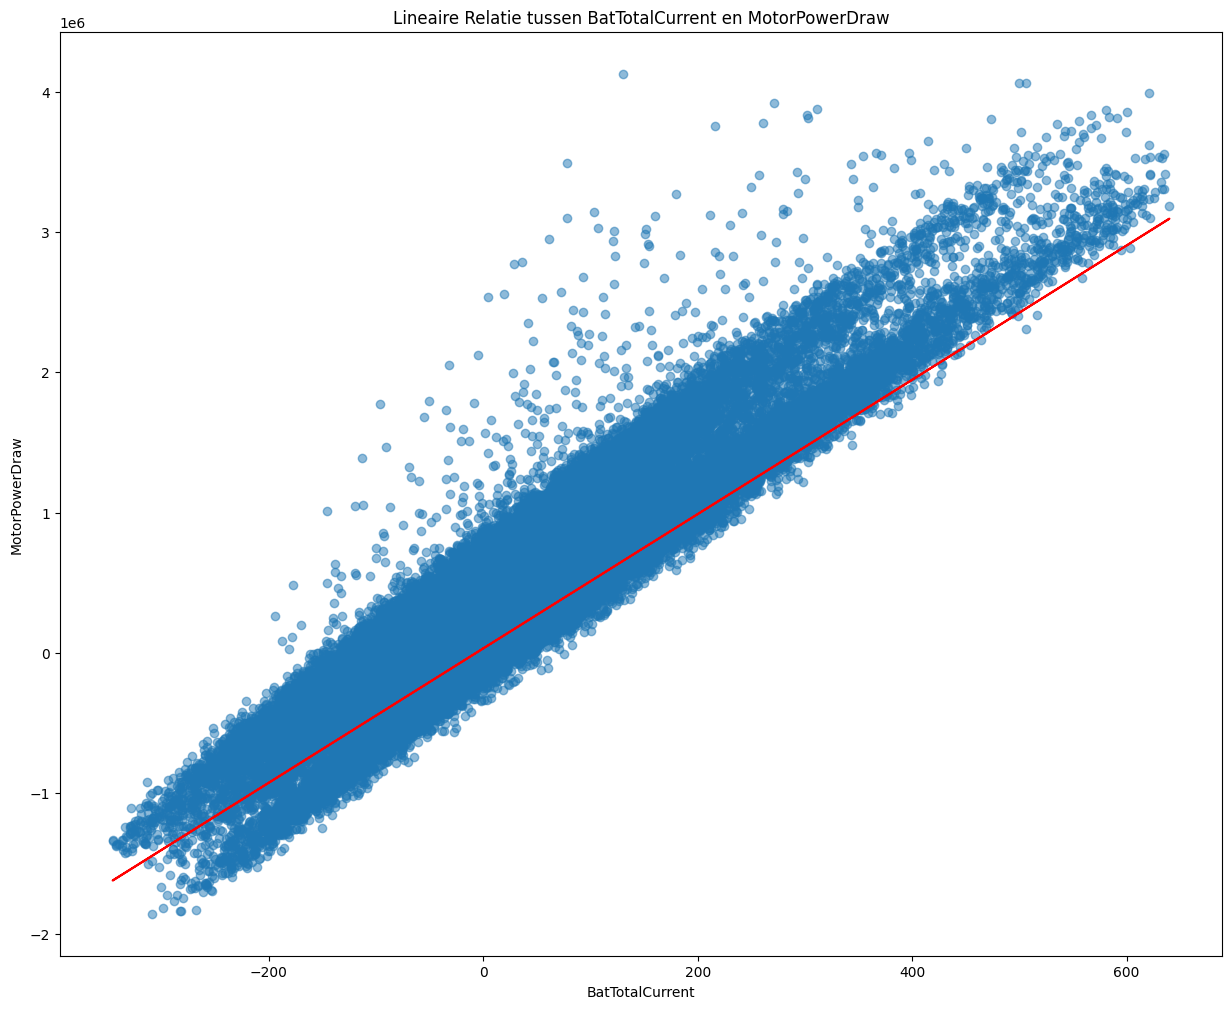

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 4785.72
  Intercept: 32851.84
  Correlatiecoëfficiënt (R-waarde): 0.85
  P-waarde: 0.00
  Sterke en significante relatie.




In [19]:
plot_linear_relationships(df, 'BatTotalCurrent','MotorPowerDraw')

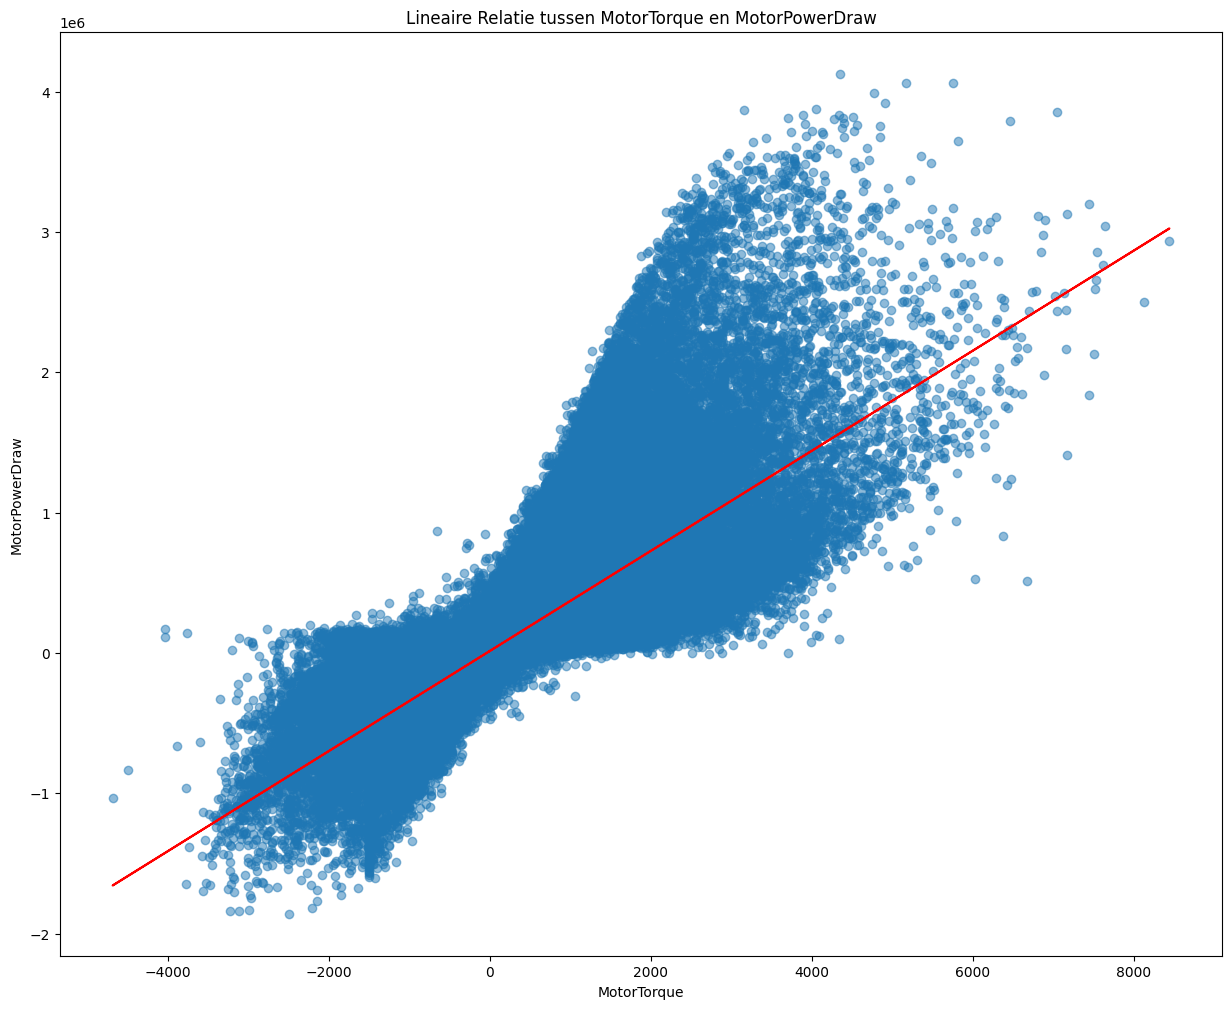

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 356.64
  Intercept: 14630.19
  Correlatiecoëfficiënt (R-waarde): 0.75
  P-waarde: 0.00
  Sterke en significante relatie.




In [20]:
plot_linear_relationships(df, 'MotorTorque','MotorPowerDraw')

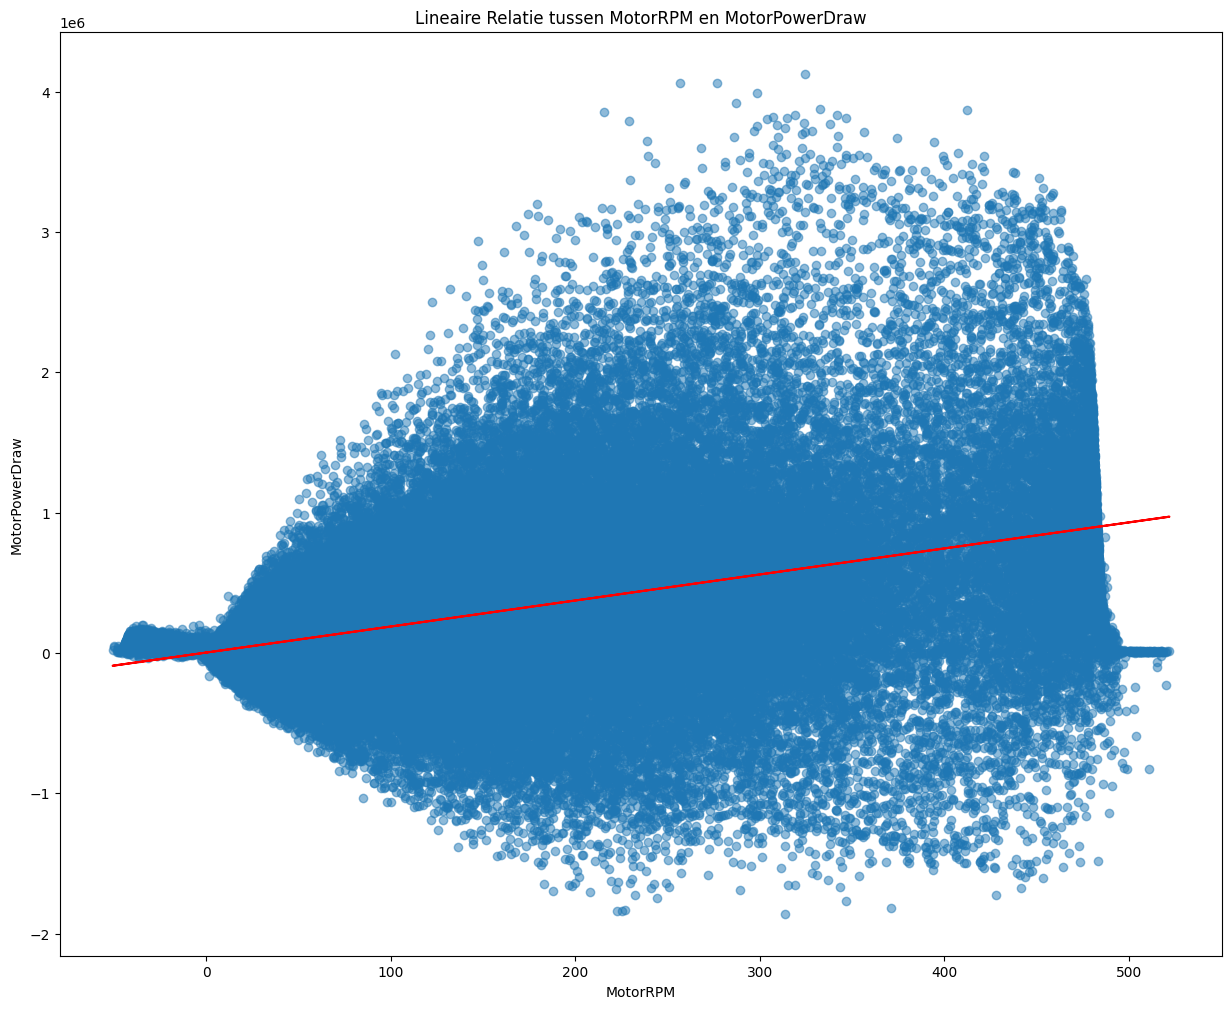

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 1854.41
  Intercept: 3524.38
  Correlatiecoëfficiënt (R-waarde): 0.56
  P-waarde: 0.00
  Matige, maar significante relatie.




In [21]:
plot_linear_relationships(df, 'MotorRPM','MotorPowerDraw')

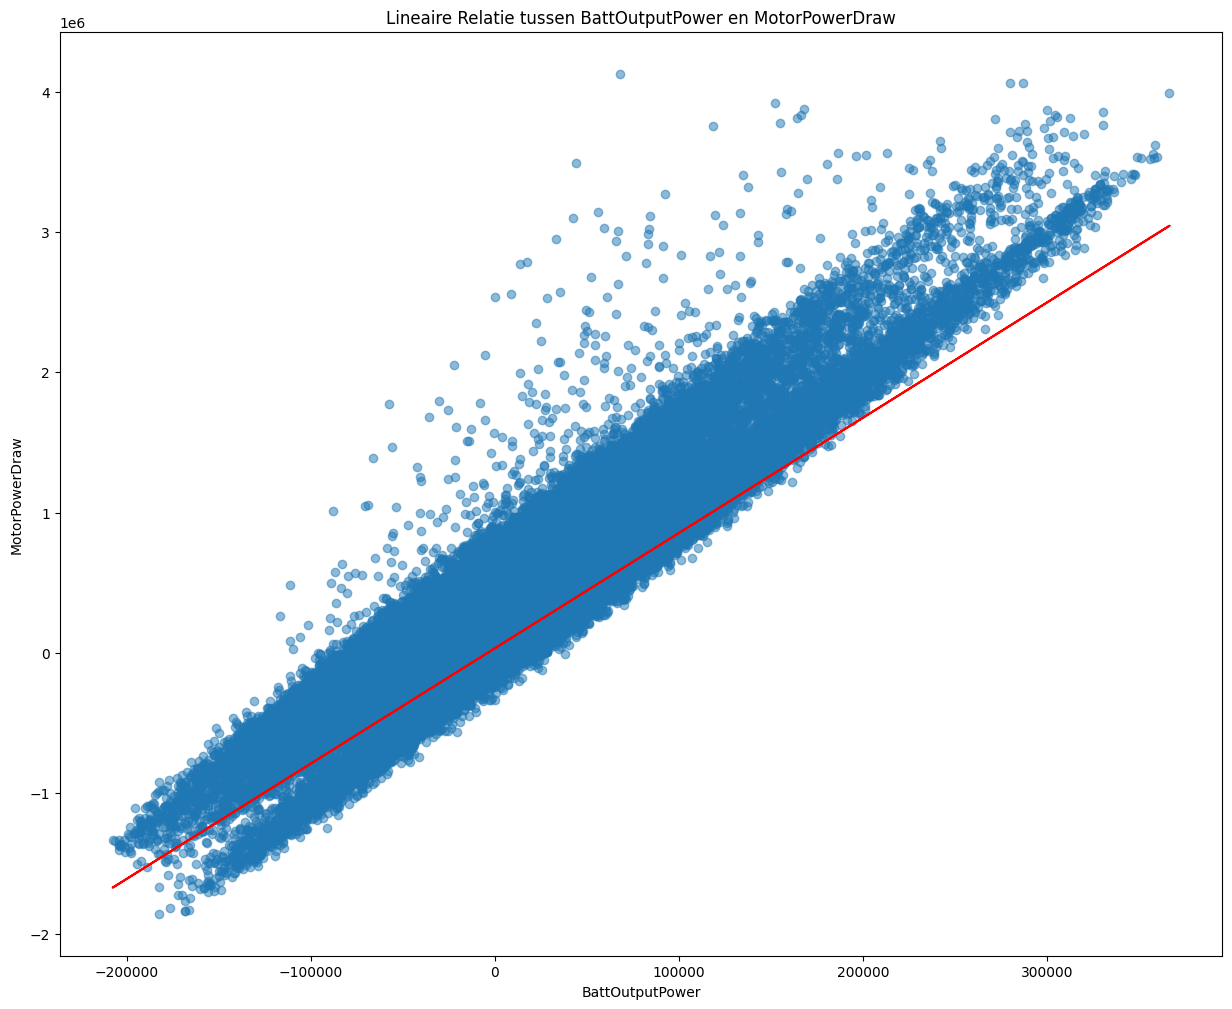

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 8.21
  Intercept: 34233.13
  Correlatiecoëfficiënt (R-waarde): 0.84
  P-waarde: 0.00
  Sterke en significante relatie.




In [22]:
plot_linear_relationships(df, 'BattOutputPower','MotorPowerDraw')

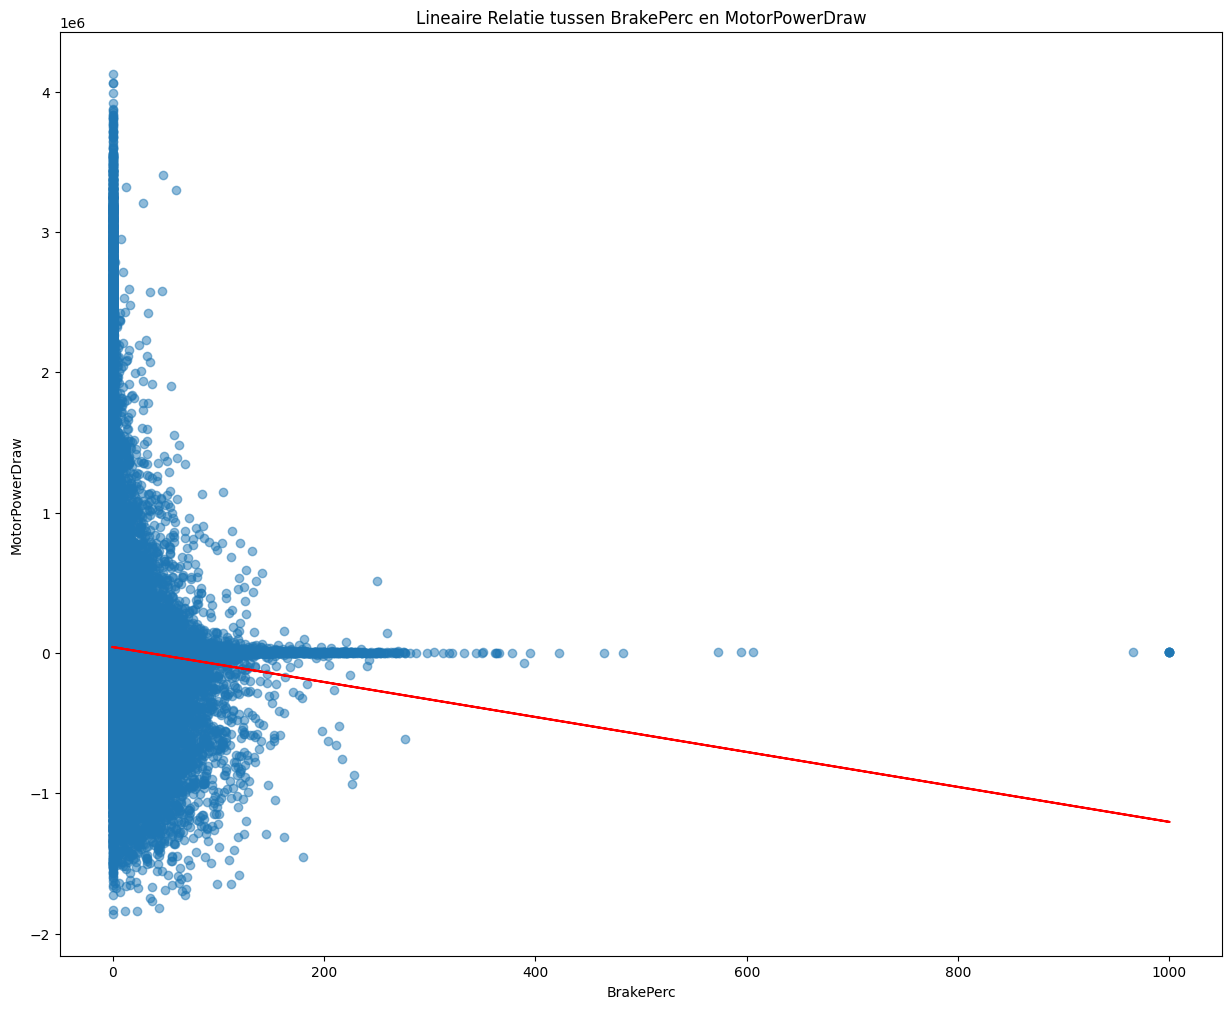

Samenvatting voor MotorPowerDraw:
  Helling (Slope): -1246.20
  Intercept: 42858.63
  Correlatiecoëfficiënt (R-waarde): -0.06
  P-waarde: 0.00
  Zwakke, maar significante relatie.




In [23]:
plot_linear_relationships(df, 'BrakePerc','MotorPowerDraw')

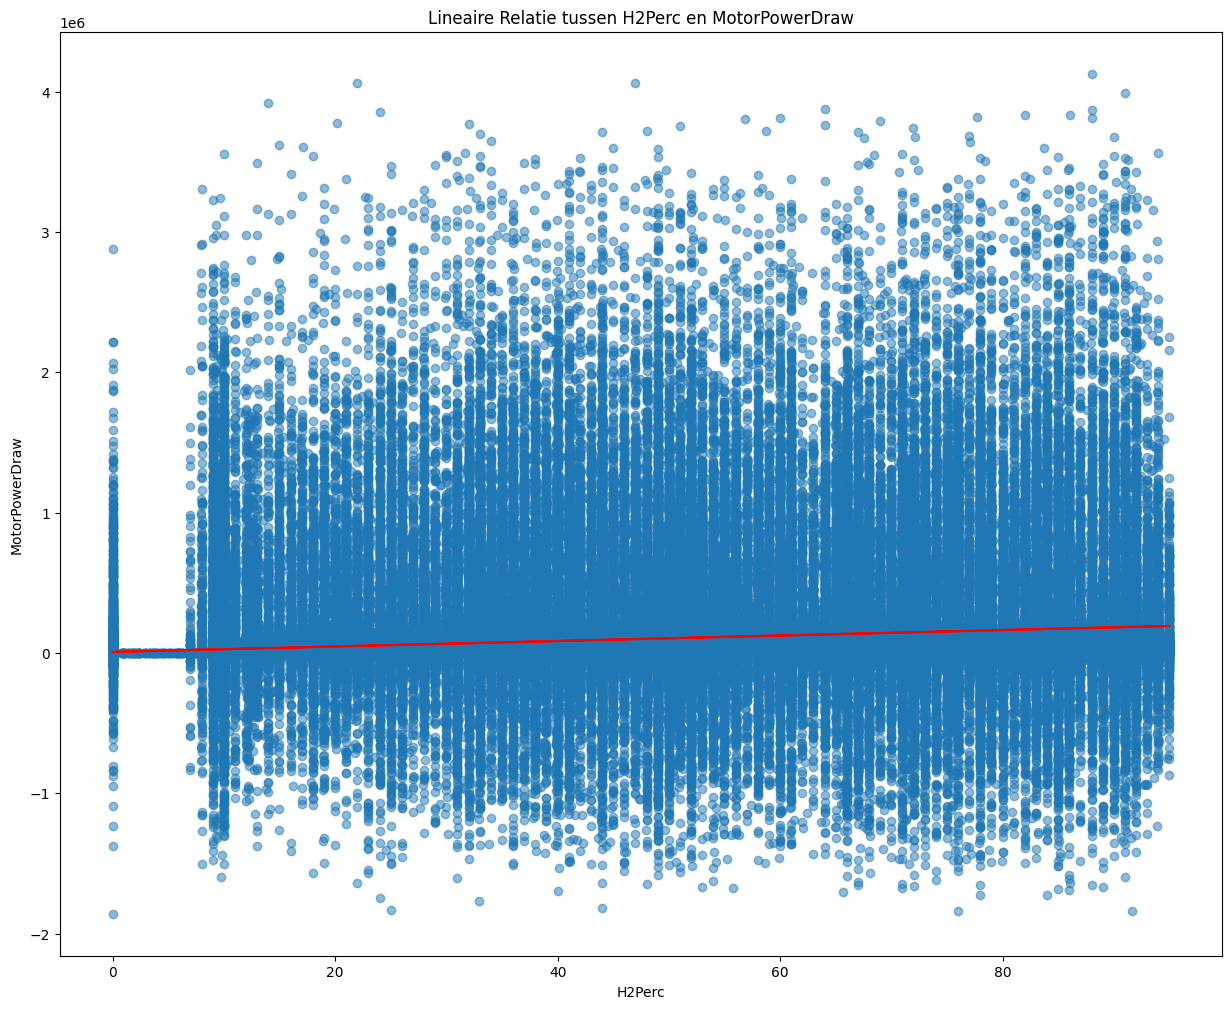

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 1949.20
  Intercept: 7973.42
  Correlatiecoëfficiënt (R-waarde): 0.23
  P-waarde: 0.00
  Zwakke, maar significante relatie.




: 

In [25]:
plot_linear_relationships(df, 'H2Perc','MotorPowerDraw')

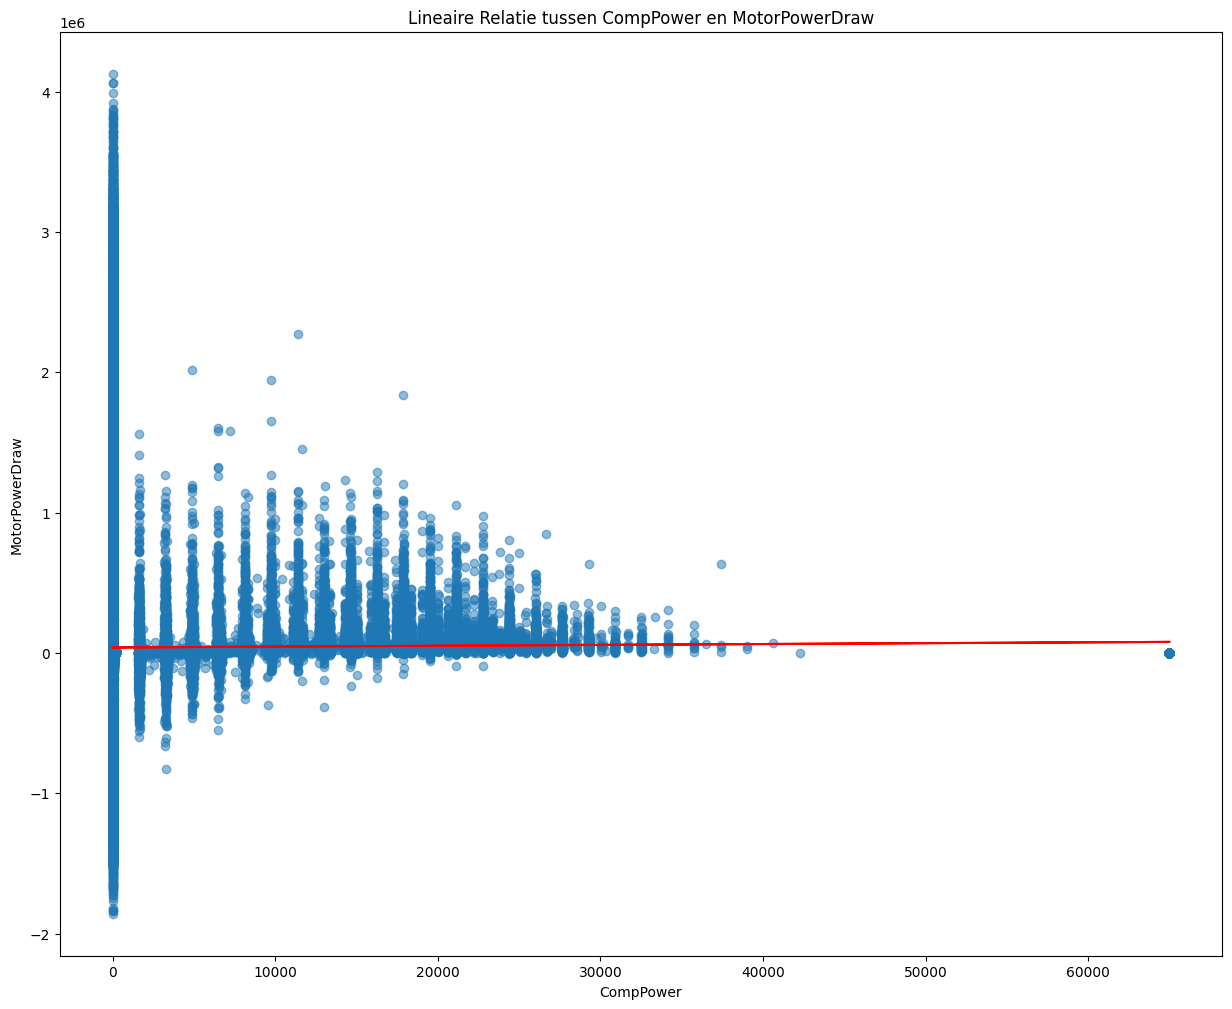

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 0.61
  Intercept: 39805.83
  Correlatiecoëfficiënt (R-waarde): 0.01
  P-waarde: 0.00
  Zwakke, maar significante relatie.




In [24]:
plot_linear_relationships(df, 'CompPower','MotorPowerDraw')

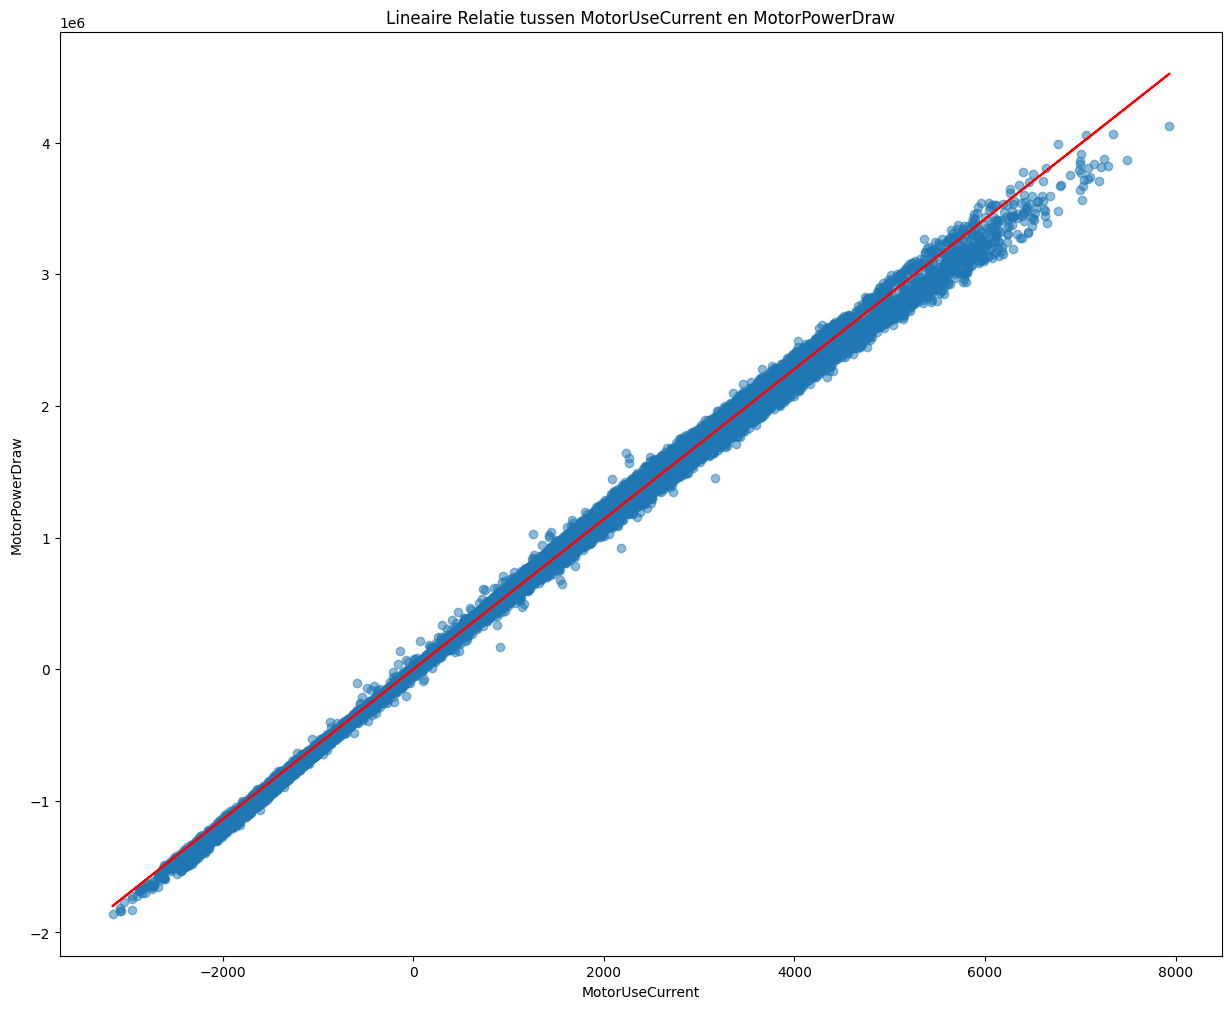

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 570.10
  Intercept: 92.85
  Correlatiecoëfficiënt (R-waarde): 1.00
  P-waarde: 0.00
  Sterke en significante relatie.




In [16]:
plot_linear_relationships(df, 'MotorUseCurrent','MotorPowerDraw')

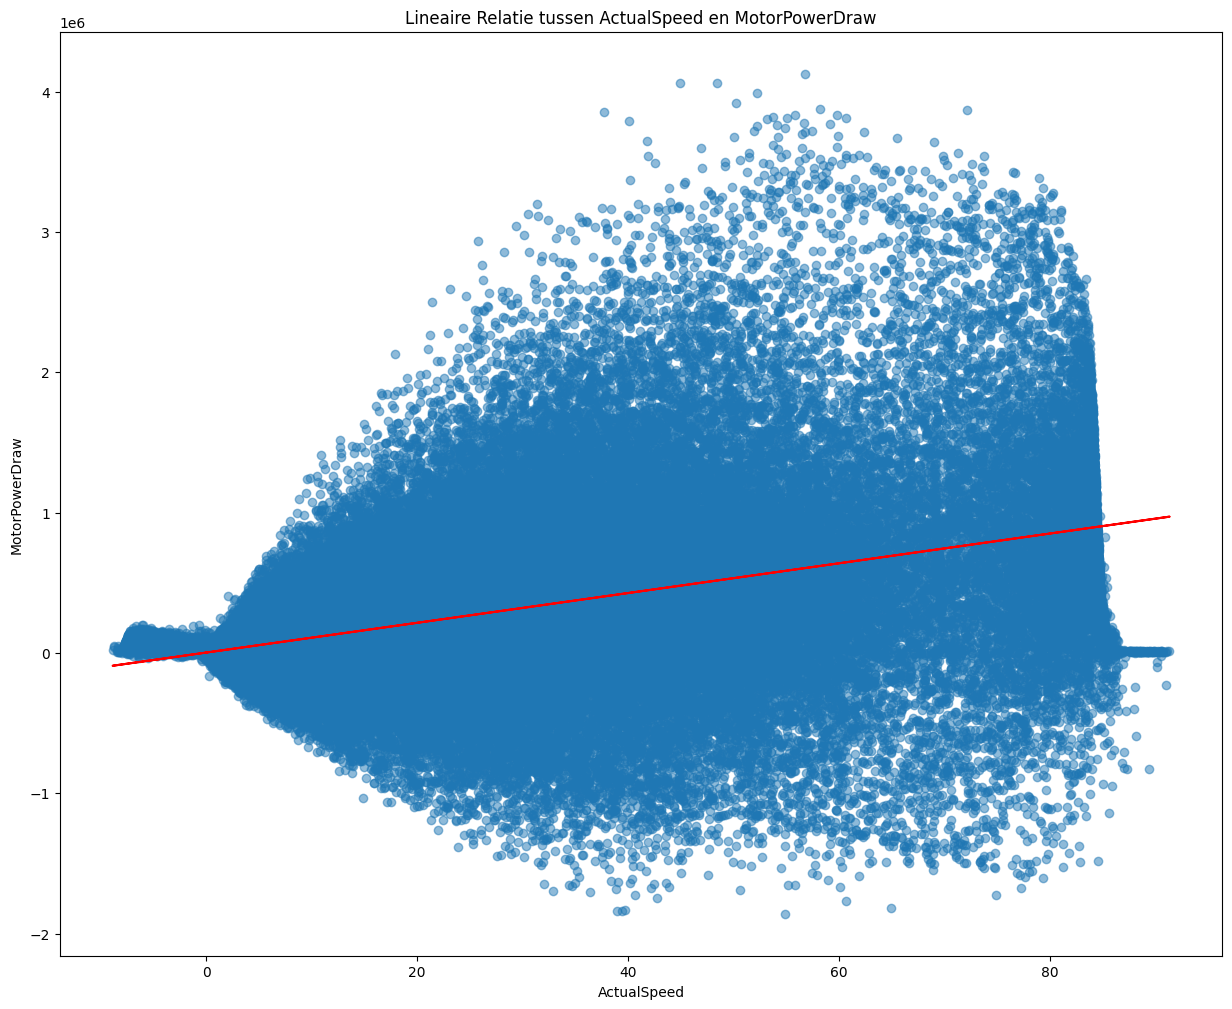

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 10596.64
  Intercept: 3524.38
  Correlatiecoëfficiënt (R-waarde): 0.56
  P-waarde: 0.00
  Matige, maar significante relatie.




In [15]:
plot_linear_relationships(df, 'ActualSpeed','MotorPowerDraw')

In [18]:
# Lijst van geselecteerde variabelen
selected_variables = [
    "H2Perc", "MotorUseCurrent", "BatTotalCurrent", "MotorTorque", 
    "ThrottlePerc", 
    "MotorRPM",  
    "ActualSpeed", "BattOutputPower", "BrakePerc" , "CompPower"
]

# Selecteer alleen de numerieke kolommen
df_clean = df.select_dtypes(include=[np.number])

# Verwijder rijen met ontbrekende waarden
df_clean = df_clean.dropna()

# Selecteer de onafhankelijke variabelen op basis van de geselecteerde lijst
X = df_clean[selected_variables]

# Selecteer de afhankelijke variabele
y = df_clean['MotorPowerDraw']

# Maak een instantie van de StandardScaler
scaler = StandardScaler()

# Schaal de onafhankelijke variabelen (X)
X_scaled = scaler.fit_transform(X)

# Voeg een constante toe voor de intercept
X_scaled = sm.add_constant(X_scaled)

# Pas het OLS model toe
model = sm.OLS(y, X_scaled).fit()

# Print de samenvatting van het model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         MotorPowerDraw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.410e+07
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:32:11   Log-Likelihood:            -1.9158e+06
No. Observations:              180863   AIC:                         3.832e+06
Df Residuals:                  180853   BIC:                         3.832e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.905e+05     22.668   8405.043      0.0

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bereken VIF voor elke variabele
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         feature       VIF
0         BatSOC  4.811115
1   ThrottlePerc  2.446432
2      BrakePerc  1.270432
3         Signal  1.831973
4  TotalDistance  7.264939
5        FC1Volt  2.076944
6         H2Temp  3.111427
7       HVACDraw  1.683476
8      MotorTemp  6.634605


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



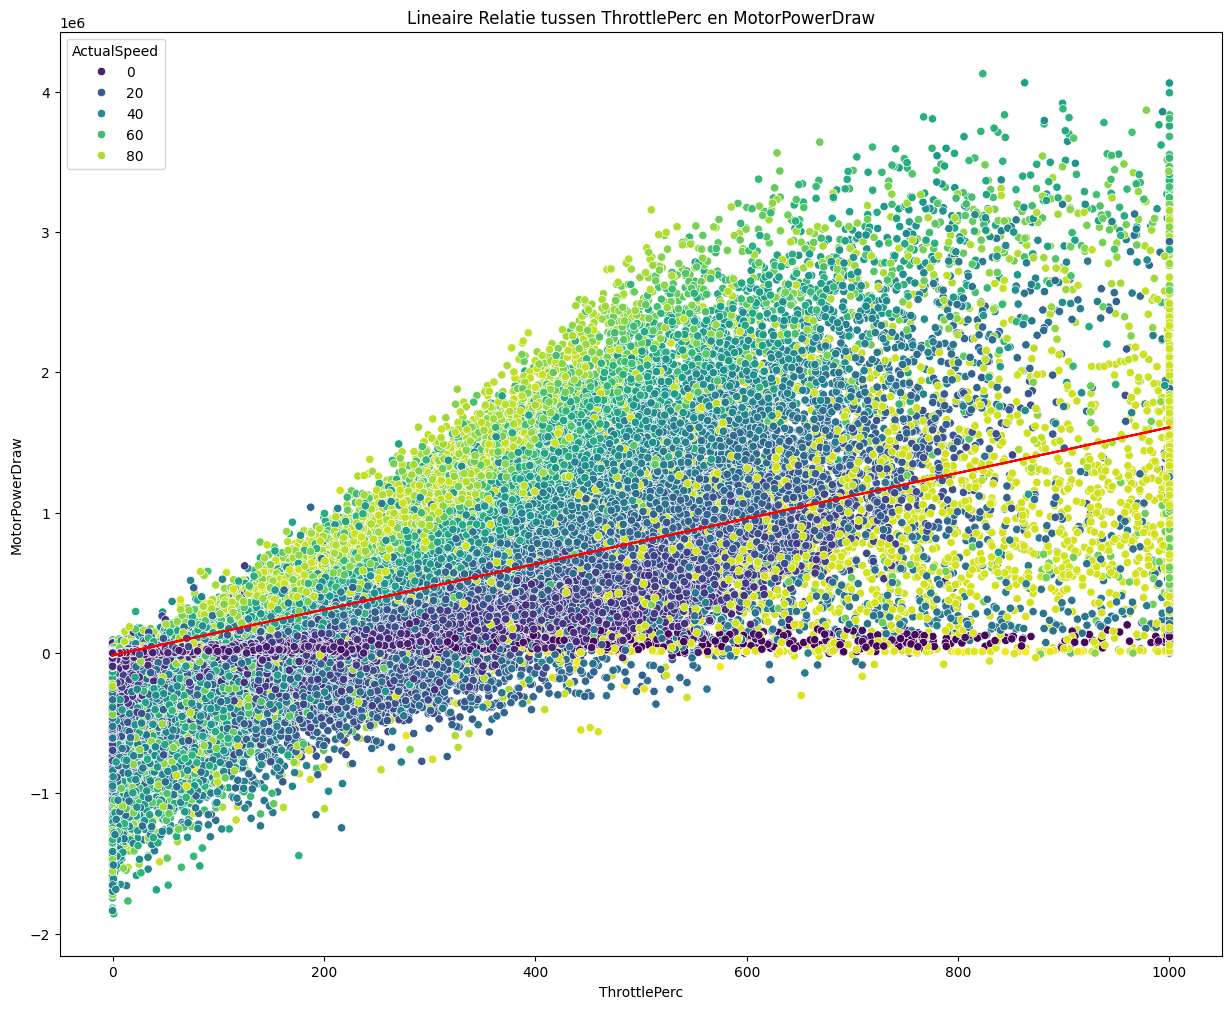

Samenvatting voor MotorPowerDraw:
  Helling (Slope): 1623.69
  Intercept: -15500.36
  Correlatiecoëfficiënt (R-waarde): 0.74
  P-waarde: 0.00
  Sterke en significante relatie.




In [32]:
plot_linear_relationships(df, 'ThrottlePerc','MotorPowerDraw',hue_column='ActualSpeed')

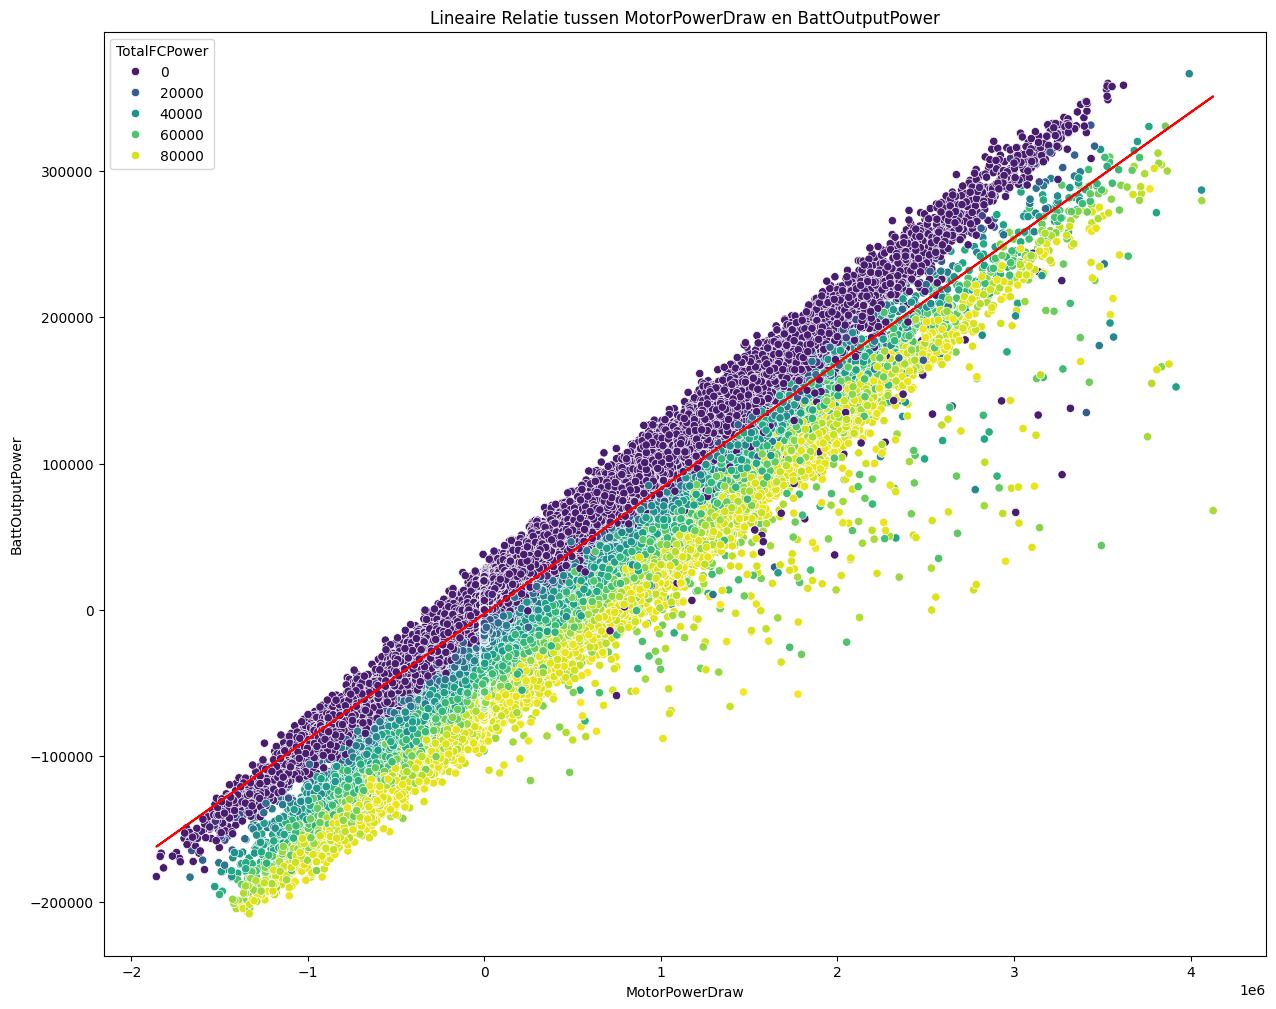

Samenvatting voor BattOutputPower:
  Helling (Slope): 0.09
  Intercept: -2711.23
  Correlatiecoëfficiënt (R-waarde): 0.84
  P-waarde: 0.00
  Sterke en significante relatie.




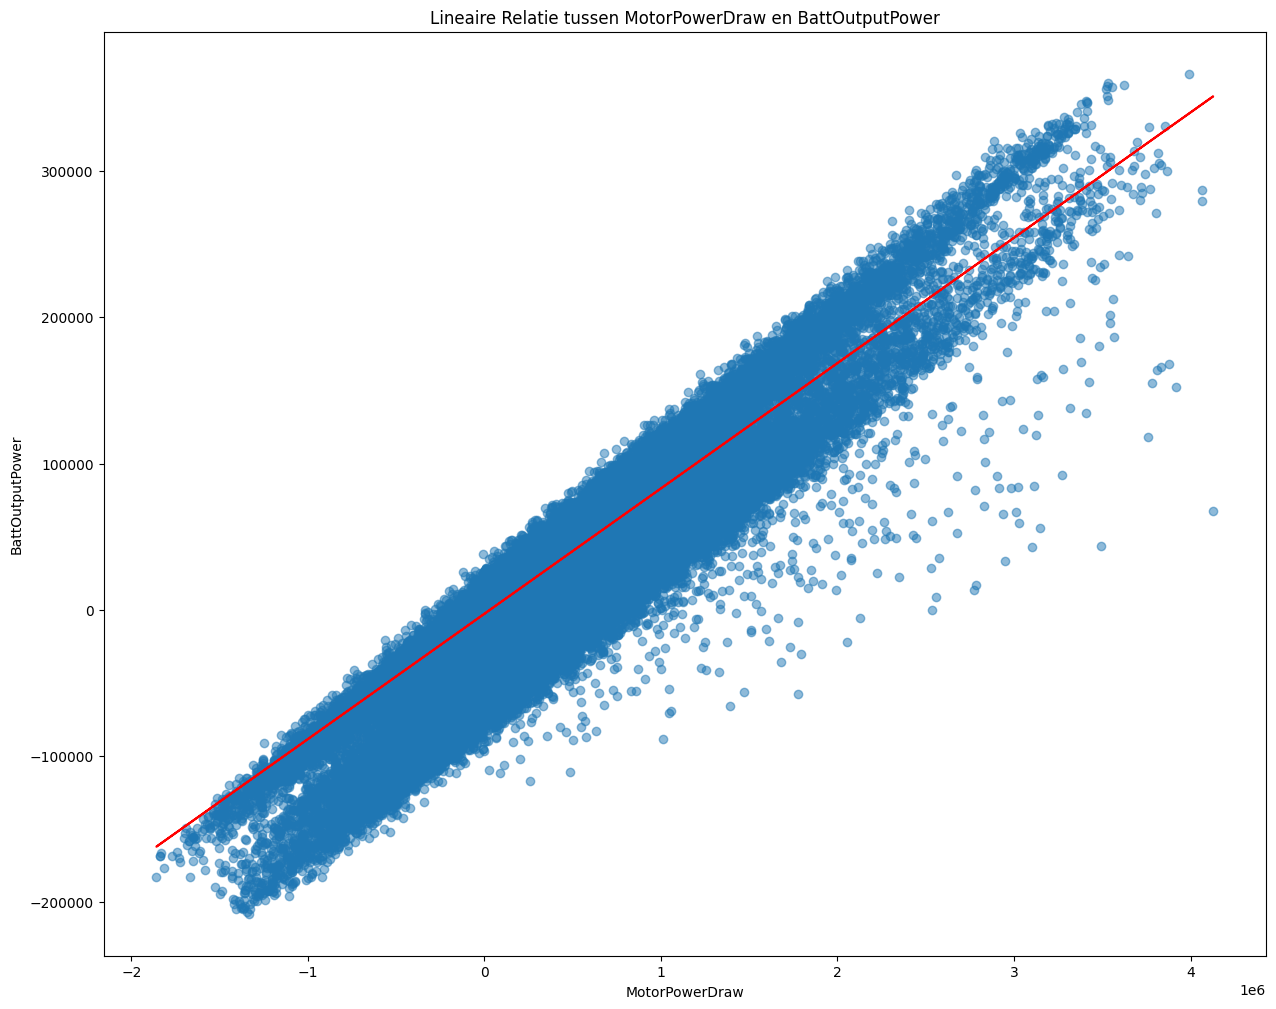

Samenvatting voor BattOutputPower:
  Helling (Slope): 0.09
  Intercept: -2711.23
  Correlatiecoëfficiënt (R-waarde): 0.84
  P-waarde: 0.00
  Sterke en significante relatie.




In [33]:
plot_linear_relationships(df, 'MotorPowerDraw','BattOutputPower',hue_column='TotalFCPower')
plot_linear_relationships(df, 'MotorPowerDraw','BattOutputPower',hue_column=None)